### Install and Import required libraries and packeges

In [ ]:
!pip install lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d707fd6dbf99bf996da4dbcb5517455c166d467bd88e9b607478815e4812ae9c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import kagglehub
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import lime
from lime.lime_tabular import LimeTabularExplainer

import shap

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

#### Import dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

df = pd.read_csv(f"{path}/diabetes.csv")

# Display initial dataset structure and info
df.info()
df.head()

100%|██████████| 8.91k/8.91k [00:00<00:00, 15.4MB/s]

Extracting files...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data visualization

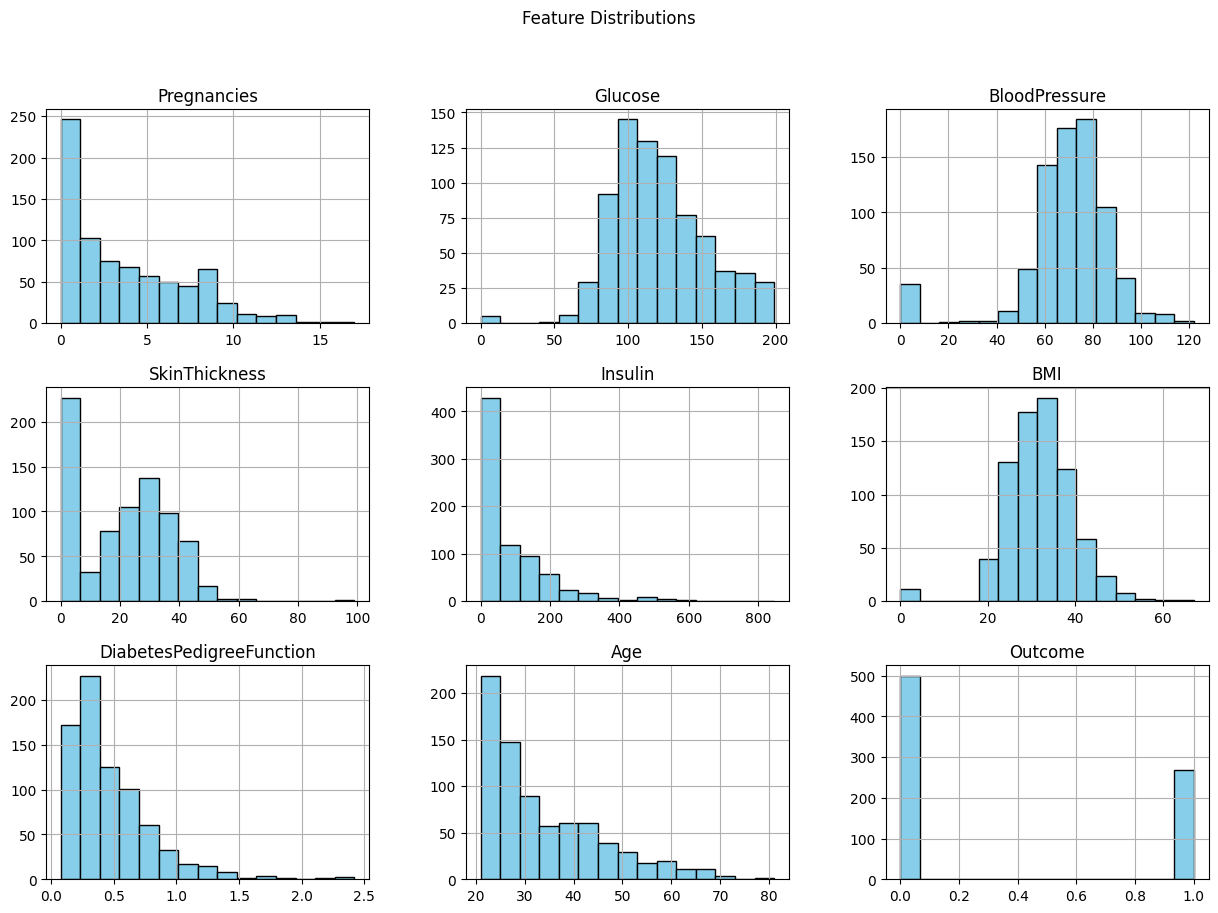

In [ ]:
# 1. Distribution of each feature
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

<ipython-input-6-b5096727ea27>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


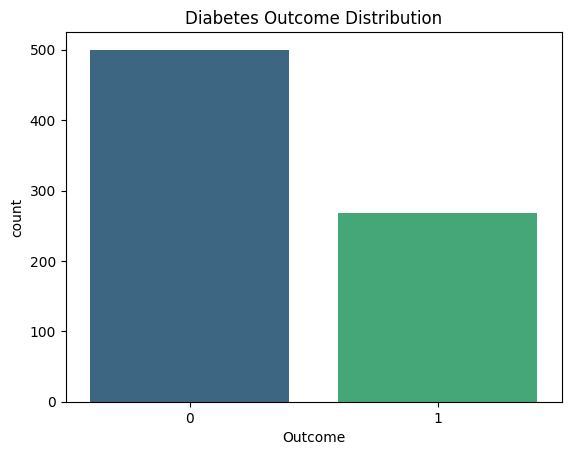

In [ ]:
# 2. Outcome count plot (target distribution)
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Diabetes Outcome Distribution')
plt.show()

<ipython-input-7-aae51ee4b67c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')


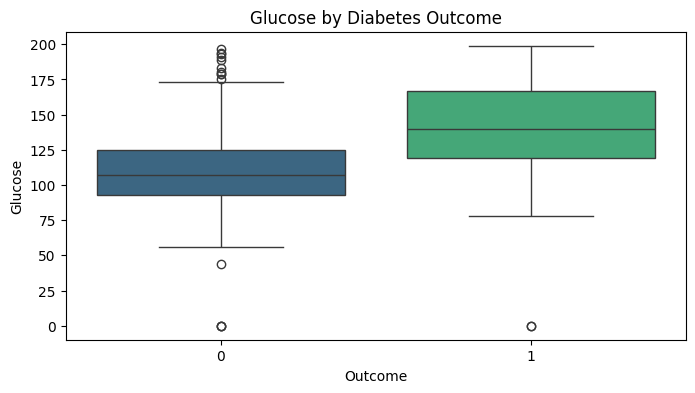

<ipython-input-7-aae51ee4b67c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')


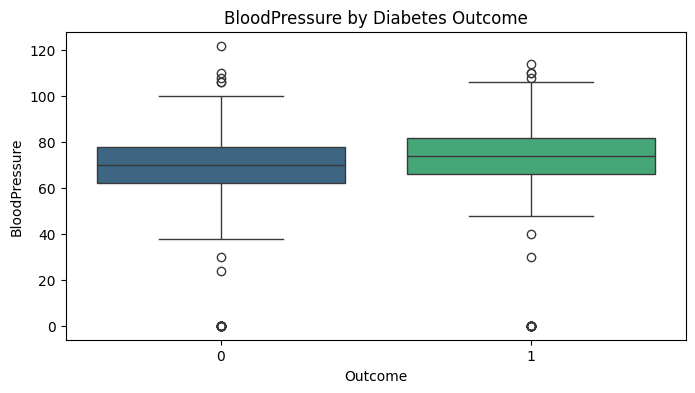

<ipython-input-7-aae51ee4b67c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')


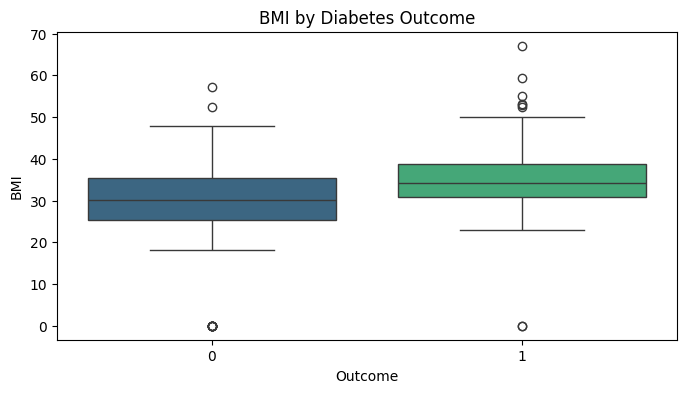

<ipython-input-7-aae51ee4b67c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')


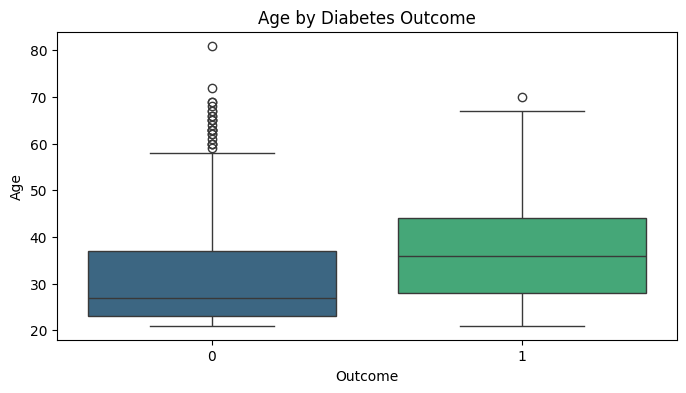

<ipython-input-7-aae51ee4b67c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')


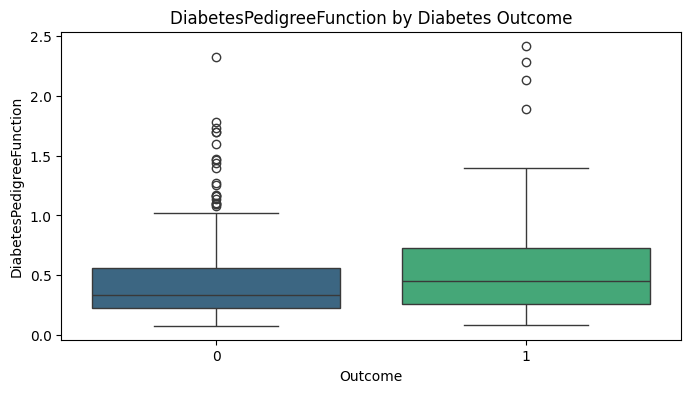

In [ ]:
# 3. Box plots of key features segmented by Outcome
for col in ['Glucose', 'BloodPressure', 'BMI', 'Age', 'DiabetesPedigreeFunction']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')
    plt.title(f'{col} by Diabetes Outcome')
    plt.show()

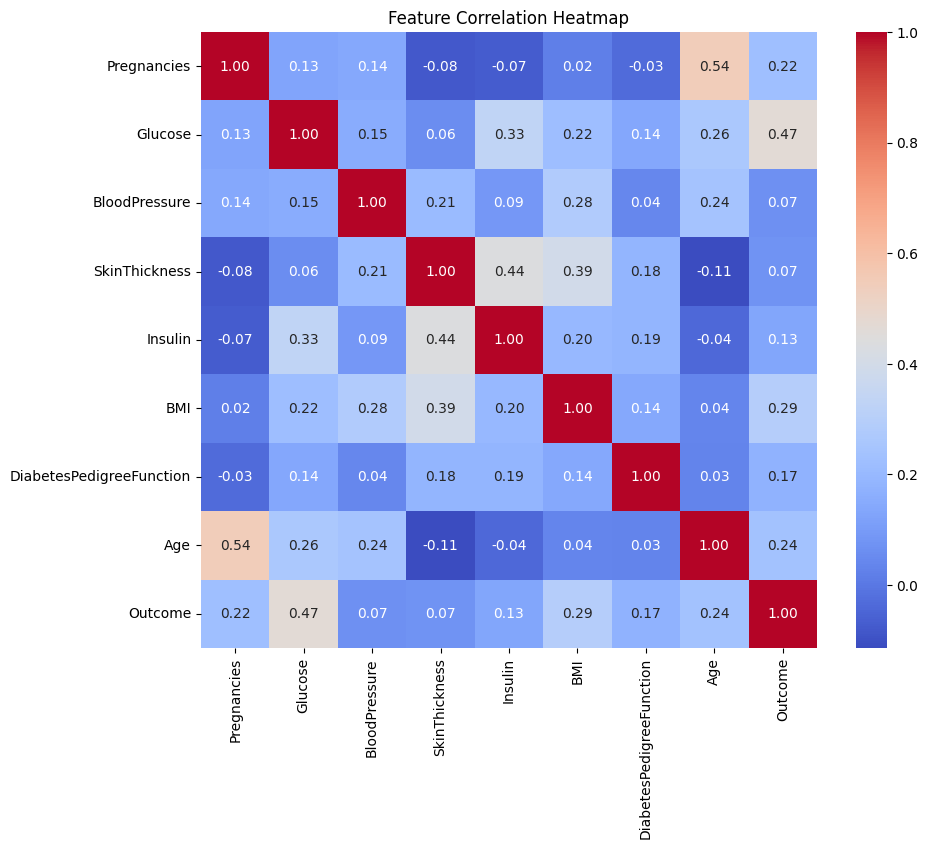

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

### Data preprocess

#### Replace 0 with median

In [ ]:
# Columns where 0 may indicate missing data
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 values with NaN for columns where 0 may indicate missing data
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)

# Impute missing values with the median of each column
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].fillna(df[cols_with_zero_as_missing].mean())

#### Remove outliers

<ipython-input-10-59a18b580fec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')


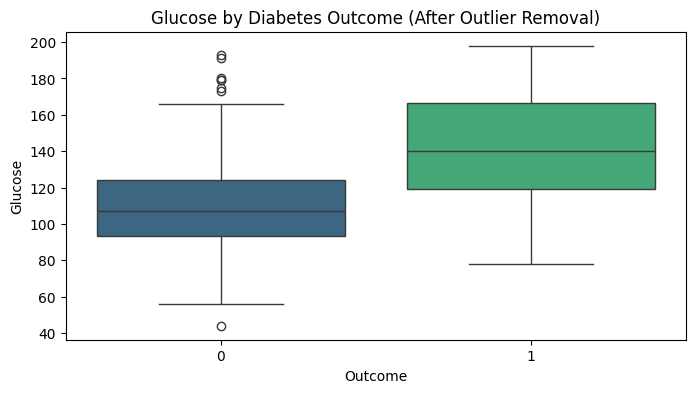

<ipython-input-10-59a18b580fec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')


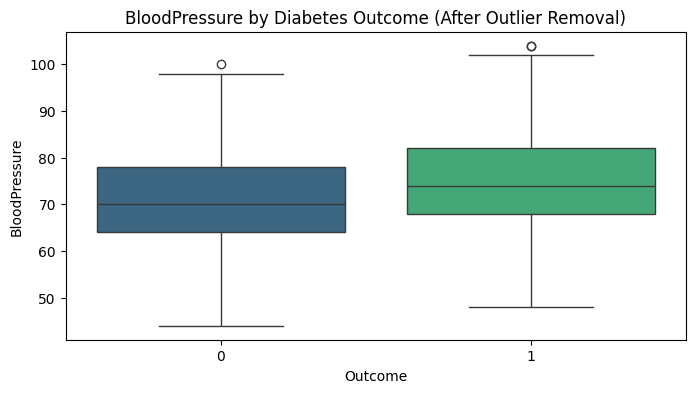

<ipython-input-10-59a18b580fec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')


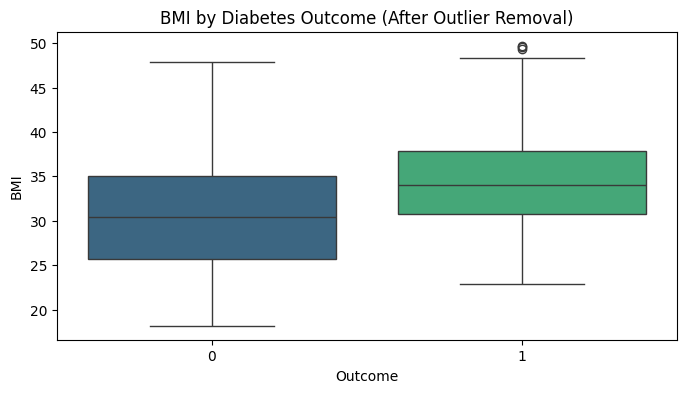

<ipython-input-10-59a18b580fec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')


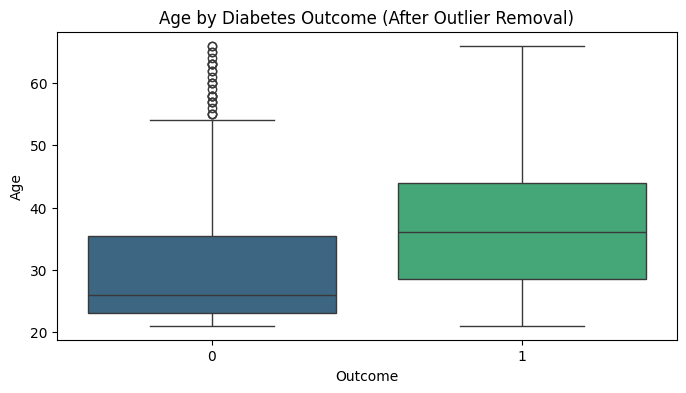

<ipython-input-10-59a18b580fec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')


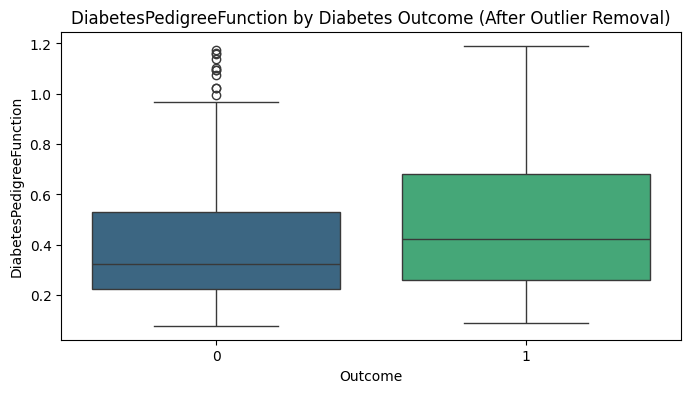

In [ ]:
# Detect and handle outliers based on the IQR method

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal to specified columns
for col in ['Glucose', 'BloodPressure', 'BMI', 'Age', 'DiabetesPedigreeFunction']:
    df = remove_outliers(df, col)

# Visualize the cleaned data to verify outliers are managed
for col in ['Glucose', 'BloodPressure', 'BMI', 'Age', 'DiabetesPedigreeFunction']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=col, data=df, palette='viridis')
    plt.title(f'{col} by Diabetes Outcome (After Outlier Removal)')
    plt.show()


### Model

In [ ]:
# Define feature and target variables
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [ ]:
# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Scale the data to improve performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames to retain feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#### Model

In [ ]:
# Corrected parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_scaled_df, y_train)

# Print best parameters found
print("Best parameters found: ", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}



Tuned Random Forest Performance:
Accuracy: 0.8201058201058201
ROC-AUC Score: 0.9061379928315413

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        96
           1       0.78      0.89      0.83        93

    accuracy                           0.82       189
   macro avg       0.83      0.82      0.82       189
weighted avg       0.83      0.82      0.82       189



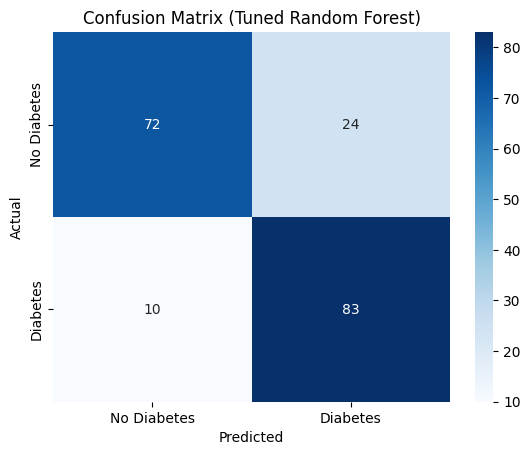

In [ ]:
# Retrieve the best estimator from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled_df)
y_pred_proba = best_rf_model.predict_proba(X_test_scaled_df)[:, 1]

# Calculate model performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Output performance metrics
print("\nTuned Random Forest Performance:")
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Explainers

#### Lime

In [ ]:
# Initialize the LimeTabularExplainer with the scaled DataFrame
explainer_lime = LimeTabularExplainer(
    training_data=X_train_scaled_df.values,  # Use the values attribute to pass a NumPy array
    mode="classification",
    feature_names=X_train_scaled_df.columns,  # Pass the feature names
    class_names=["No Diabetes", "Diabetes"],
    discretize_continuous=True
)

# Select an instance to explain (e.g., the 10th test instance)
i = 10  # You can change this index to explore different instances
exp = explainer_lime.explain_instance(
    data_row=X_test_scaled_df.iloc[i],  # Use the scaled test instance
    predict_fn=best_rf_model.predict_proba
)

# Display the explanation for the chosen instance
exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

#### Shap

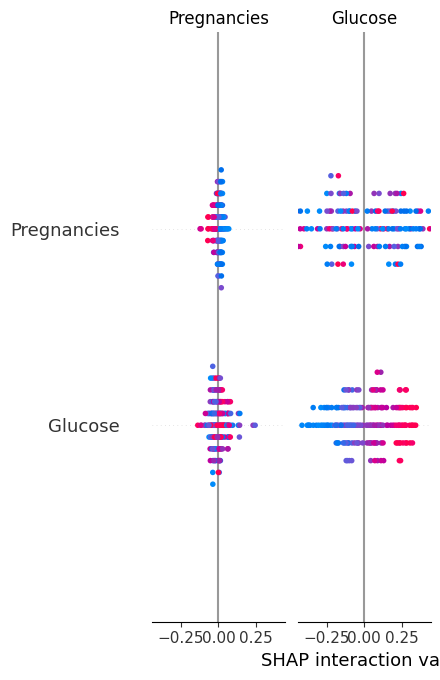

In [ ]:
# Initialize SHAP JavaScript visualization
shap.initjs()

# Initialize the SHAP TreeExplainer with the tuned RandomForest model
explainer_shap1 = shap.TreeExplainer(best_rf_model)

# Compute SHAP values for the scaled test set
shap_values = explainer_shap1.shap_values(X_test_scaled_df)

# For binary classification, use SHAP values for the positive class
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_values_to_use = shap_values[1]  # Positive class
    base_value = explainer_shap1.expected_value[1]  # Base value for the positive class
else:
    shap_values_to_use = shap_values
    base_value = explainer_shap1.expected_value

# Visualize the global importance of features using a SHAP summary plot
shap.summary_plot(shap_values_to_use, X_test_scaled_df, plot_type="bar")

# Visualize the SHAP values for a specific instance (e.g., the 10th test instance)
# Use shap.force_plot with adjusted parameters for better compatibility
shap.force_plot(
    base_value[1],  # Assuming you want to explain the "Diabetes" class (index 1)
    shap_values_to_use[10, :, 1],  # Use shap values for the 10th instance and the "Diabetes" class
    X_test_scaled_df.iloc[10, :]  # Pass the Pandas Series directly instead of a dictionary
)

Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values: (100, 8, 2)
Shape of X_test_sample: (100, 8)


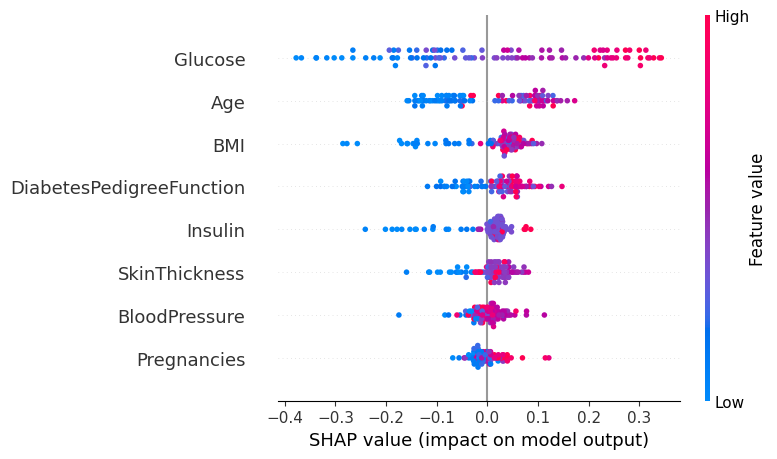

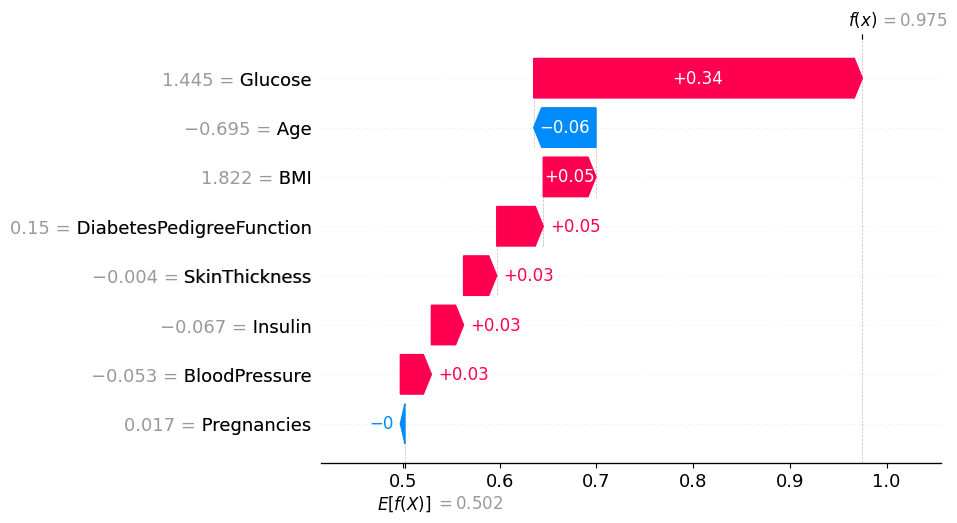

In [ ]:

# Initialize SHAP JavaScript visualization
shap.initjs()

# Initialize the SHAP TreeExplainer with your tuned RandomForest model
explainer_shap = shap.TreeExplainer(best_rf_model)

# Optionally, select a sample of the test data
num_samples = 100
X_test_sample = X_test_scaled_df.iloc[:num_samples]

# Compute SHAP values for the test data sample
shap_values = explainer_shap.shap_values(X_test_sample)

# Check the shape of shap_values
print("Type of shap_values:", type(shap_values))
print("Shape of shap_values:", shap_values.shape)
print("Shape of X_test_sample:", X_test_sample.shape)

# Assuming shap_values has shape (samples, features, classes)
positive_class_index = 1  # Adjust based on your classes

# Extract SHAP values for the positive class
shap_values_positive_class = shap_values[:, :, positive_class_index]  # Shape: (samples, features)

# Extract base value for the positive class
base_value = explainer_shap.expected_value[positive_class_index]

# Visualize global feature importance with a SHAP summary plot
shap.summary_plot(shap_values_positive_class, X_test_sample)

# Visualize SHAP values for a specific instance (e.g., the 10th test instance)
instance_index = 10

# Extract SHAP values and data for the instance
shap_values_instance = shap_values_positive_class[instance_index]  # Shape: (features,)
instance_data = X_test_sample.iloc[instance_index]  # Features for the instance

# Create an Explanation object for the instance
instance_explanation = shap.Explanation(
    values=shap_values_instance,
    base_values=base_value,
    data=instance_data,
    feature_names=X_test_sample.columns
)

# Waterfall plot
shap.plots.waterfall(instance_explanation)

# Force plot
shap.plots.force(instance_explanation)


In [ ]:
# Import necessary libraries
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr, kendalltau
import numpy as np

# Evaluation Metrics Function
def evaluate_explanations(X_test, y_test, best_rf_model, explainer_shap, shap_values):
    # Select an instance to evaluate (e.g., the 10th test instance)
    i = 10
    original_instance = X_test.iloc[i:i+1]  # Select a single instance as a DataFrame

    # **Stability of SHAP Explanations**
    # Perturb the instance slightly
    perturbed_instance = original_instance + np.random.normal(0, 0.01, original_instance.shape)

    # Compute SHAP values for original and perturbed instances
    shap_original = explainer_shap.shap_values(original_instance)
    shap_perturbed = explainer_shap.shap_values(perturbed_instance)

    # Handle multi-class output
    if isinstance(shap_original, list):
        shap_original = shap_original[1]  # For the positive class (index 1)
        shap_perturbed = shap_perturbed[1]  # For the positive class (index 1)

    # Cosine similarity between SHAP values for stability
    cosine_similarity = 1 - cosine(shap_original.flatten(), shap_perturbed.flatten())

    # **Additivity Error**
    # Check if SHAP values sum up correctly
    predicted_value = best_rf_model.predict_proba(original_instance)[0][1]
    additivity_error = np.abs((np.sum(shap_original) + explainer_shap.expected_value[1]) - predicted_value)

    # **Global Feature Importance Consistency**
    # Calculate global SHAP importance as mean absolute SHAP values
    if isinstance(shap_values, list):
        global_shap_importance = np.mean(np.abs(shap_values[1]), axis=0)  # For positive class
    else:
        global_shap_importance = np.mean(np.abs(shap_values), axis=0)

    # Retrieve model feature importance
    model_importance = best_rf_model.feature_importances_

    # Align dimensions for comparison
    global_shap_importance = global_shap_importance[: len(model_importance)]  # Ensure alignment with model features

    # Compute Spearman correlation for feature importance consistency
    spearman_corr, _ = spearmanr(global_shap_importance, model_importance)

    # **Instance-Level Feature Ranking Consistency**
    # Rank features based on SHAP importance for the instance
    shap_feature_ranking = np.argsort(-np.abs(shap_original).flatten()[: len(model_importance)])
    model_feature_ranking = np.argsort(-model_importance)

    # Compute Kendall's Tau for instance-level ranking consistency
    kendall_tau, _ = kendalltau(shap_feature_ranking, model_feature_ranking)

    # Compile and return results
    evaluation_metrics = {
        "Cosine Similarity (Stability)": cosine_similarity,
        "Additivity Error": additivity_error,
        "Spearman Correlation (Global Importance Consistency)": spearman_corr,
        "Kendall Tau (Instance-Level Ranking Consistency)": kendall_tau
    }

    return evaluation_metrics

# Initialize SHAP TreeExplainer
shap.initjs()
explainer_shap = shap.TreeExplainer(best_rf_model)

# Compute SHAP values for the entire test set
shap_values = explainer_shap.shap_values(X_test_scaled_df)

# Execute Evaluation
evaluation_results = evaluate_explanations(X_test_scaled_df, y_test, best_rf_model, explainer_shap, shap_values)
# Print Evaluation Metrics
print("Evaluation Metrics:")
for metric, value in evaluation_results.items():
    if isinstance(value, np.ndarray):  # Handle NumPy arrays
        value = value.mean()  # Example: Take the mean for arrays
    print(f"{metric}: {value:.4f}")


Evaluation Metrics:
Cosine Similarity (Stability): 0.9999
Additivity Error: 0.4730
Spearman Correlation (Global Importance Consistency): 0.9471
Kendall Tau (Instance-Level Ranking Consistency): 0.5714
